# Multiple Linear Regression Tutorial
## House Price Prediction Using Multiple Features

Welcome to **Multiple Linear Regression**! This builds upon simple linear regression by using multiple features to make predictions.

### What you'll learn:
- How to use multiple features (area, bedrooms, age) simultaneously
- Feature scaling and its importance in multiple regression
- Correlation analysis between multiple variables
- How to interpret coefficients in multiple regression
- Comparison with simple linear regression performance

### Key Concepts:
- **Multiple features**: Using more than one input variable
- **Feature scaling**: Standardizing features for better performance
- **Multicollinearity**: When features are correlated with each other
- **Feature importance**: Understanding which features matter most

Let's dive into multiple linear regression! 🚀

## Step 1: Import Libraries and Load Data

We'll need additional preprocessing tools for multiple features.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler  # New: for feature scaling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [3]:
import kagglehub
import os

path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")
print("Path to dataset: ", path)
files = os.listdir(path)
print("Files in dataset: ", files)

Path to dataset:  /Users/anto/.cache/kagglehub/datasets/harishkumardatalab/housing-price-prediction/versions/1
Files in dataset:  ['Housing.csv']


In [5]:
# Load the dataset
data = pd.read_csv(os.path.join(path, [f for f in files if f.endswith('.csv')][0]))
print("✅ Libraries imported and data loaded!")
print(f"Dataset shape: {data.shape}")
print(f"Columns: {list(data.columns)}")
data.head()

✅ Libraries imported and data loaded!
Dataset shape: (545, 13)
Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Step 2: Explore the Dataset

Let's understand our data better by examining relationships between multiple features and the target variable.

In [6]:
# Explore the dataset structure and basic statistics
print("=" * 50)
print("DATASET EXPLORATION")
print("=" * 50)

# Basic information about the dataset
print(f"Dataset shape: {data.shape}")
print(f"Features: {list(data.columns)}")
print(f"Data types:\n{data.dtypes}")

# Check for missing values
print(f"\nMissing values:\n{data.isnull().sum()}")

# Basic statistical summary
print(f"\nStatistical Summary:")
print(data.describe())

# Check target variable distribution
print(f"\nTarget Variable (Price) Analysis:")
print(f"Mean price: ${data['price'].mean():,.2f}")
print(f"Median price: ${data['price'].median():,.2f}")
print(f"Price range: ${data['price'].min():,.2f} - ${data['price'].max():,.2f}")
print(f"Price std: ${data['price'].std():,.2f}")

# Unique values for categorical features
categorical_features = ['location']
for feature in categorical_features:
    if feature in data.columns:
        print(f"\n{feature.capitalize()} unique values: {data[feature].nunique()}")
        print(f"{feature.capitalize()} values: {data[feature].unique()}")

print("\n✅ Dataset exploration complete!")

DATASET EXPLORATION
Dataset shape: (545, 13)
Features: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Data types:
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

Missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Statistical Summary:
              price          area    bedrooms   bathrooms 

## Step 3: Correlation Analysis

Analyze how different features correlate with each other and with the target variable (price).

CORRELATION ANALYSIS
Correlation Matrix:
            area  bedrooms  bathrooms  stories  price
area       1.000     0.152      0.194    0.084  0.536
bedrooms   0.152     1.000      0.374    0.409  0.366
bathrooms  0.194     0.374      1.000    0.326  0.518
stories    0.084     0.409      0.326    1.000  0.421
price      0.536     0.366      0.518    0.421  1.000

Correlations with Price (sorted):
  area      :   0.536 (Moderate Positive)
  bathrooms :   0.518 (Moderate Positive)
  stories   :   0.421 (Moderate Positive)
  bedrooms  :   0.366 (Moderate Positive)


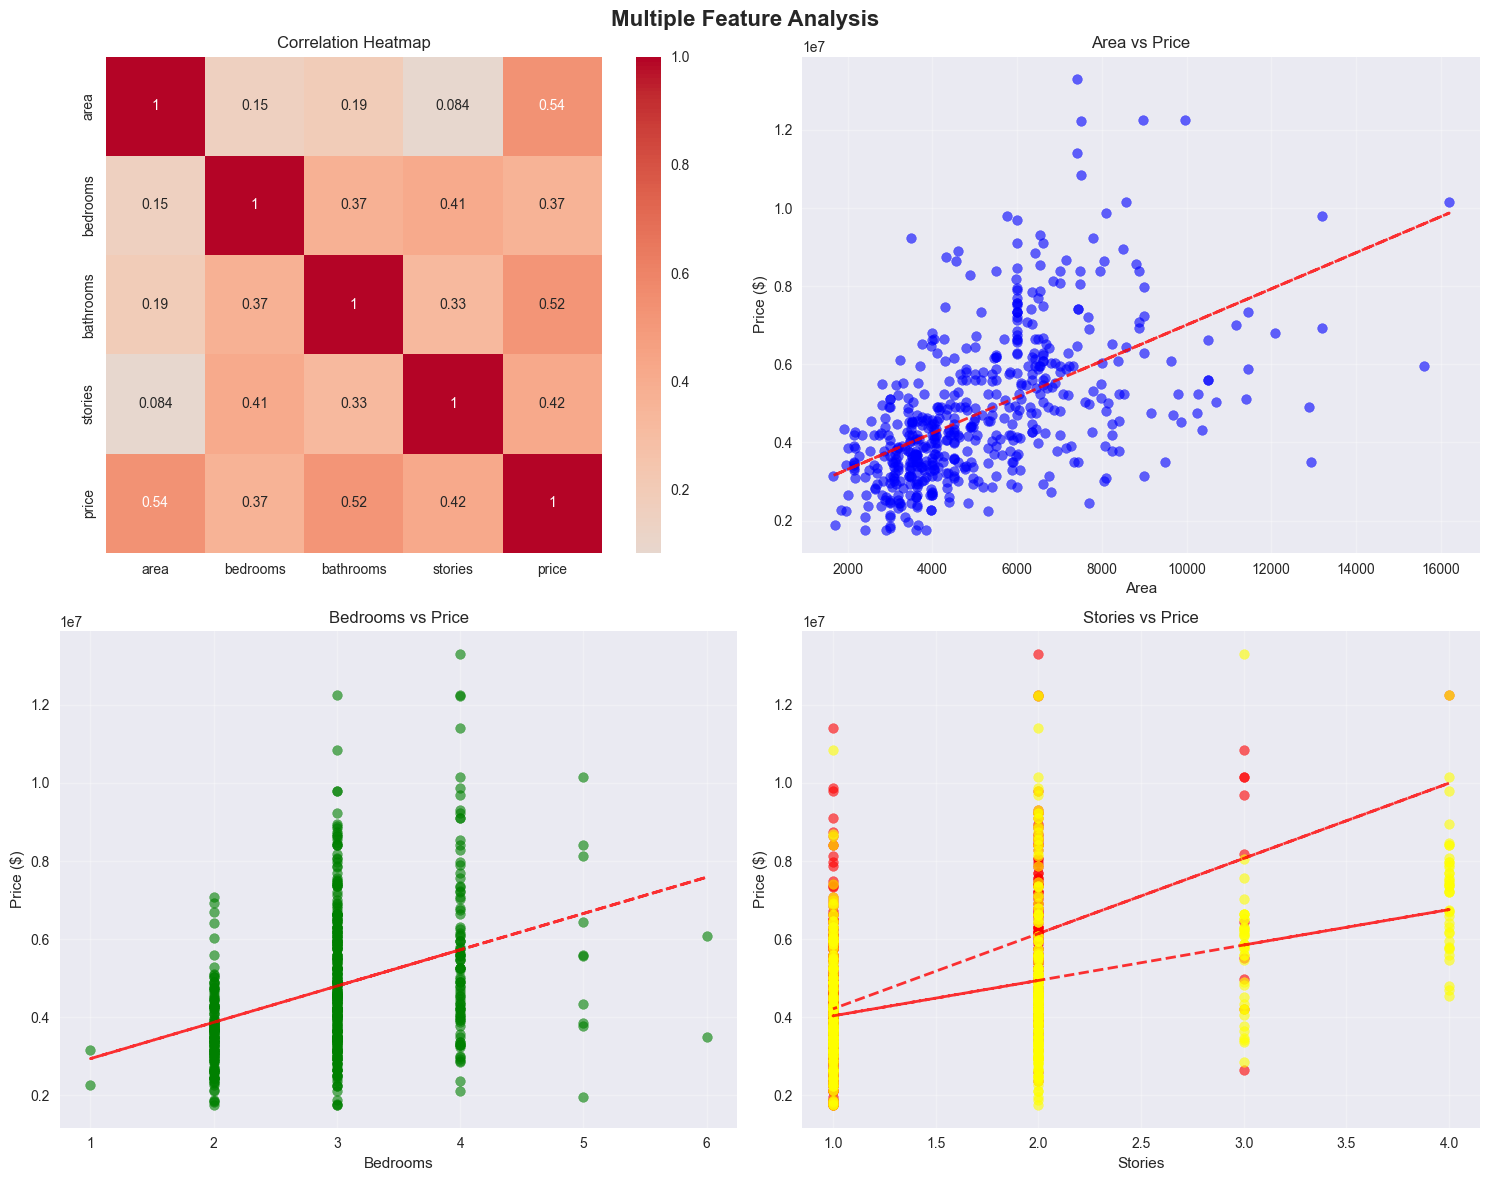


🔍 Multicollinearity Check:
Strong correlations between features (> 0.7 or < -0.7):
If no strong correlations listed above, multicollinearity is not a major concern.

✅ Correlation analysis complete!


In [9]:
# Correlation analysis between features and target
print("=" * 50)
print("CORRELATION ANALYSIS")
print("=" * 50)

# Select numerical features for correlation analysis
numerical_features = ['area', 'bedrooms', 'bathrooms','stories', 'price']
correlation_data = data[numerical_features]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()
print("Correlation Matrix:")
print(correlation_matrix.round(3))

# Correlation with target variable (price)
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(f"\nCorrelations with Price (sorted):")
for feature, corr in price_correlations.items():
    if feature != 'price':
        strength = ""
        if abs(corr) > 0.7:
            strength = "Strong"
        elif abs(corr) > 0.3:
            strength = "Moderate"
        else:
            strength = "Weak"
        
        direction = "Positive" if corr > 0 else "Negative"
        print(f"  {feature:10s}: {corr:7.3f} ({strength} {direction})")

# Create visualizations for correlations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Multiple Feature Analysis', fontsize=16, fontweight='bold')

# 1. Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0, 0])
axes[0, 0].set_title('Correlation Heatmap')

# 2. Scatter plots of features vs price
features_to_plot = ['area', 'bedrooms', 'bathrooms', 'stories']
colors = ['blue', 'green', 'red', 'yellow']

for i, (feature, color) in enumerate(zip(features_to_plot, colors)):
    if i == 0:
        ax = axes[0, 1]
    elif i == 1:
        ax = axes[1, 0]
    else:
        ax = axes[1, 1]
    
    ax.scatter(data[feature], data['price'], alpha=0.6, color=color)
    ax.set_xlabel(f'{feature.capitalize()}')
    ax.set_ylabel('Price ($)')
    ax.set_title(f'{feature.capitalize()} vs Price')
    ax.grid(True, alpha=0.3)
    
    # Add trend line
    z = np.polyfit(data[feature], data['price'], 1)
    p = np.poly1d(z)
    ax.plot(data[feature], p(data[feature]), "r--", alpha=0.8, linewidth=2)

plt.tight_layout()
plt.show()

# Check for multicollinearity
print(f"\n🔍 Multicollinearity Check:")
print("Strong correlations between features (> 0.7 or < -0.7):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7 and correlation_matrix.columns[i] != 'price' and correlation_matrix.columns[j] != 'price':
            print(f"  {correlation_matrix.columns[i]} & {correlation_matrix.columns[j]}: {corr_value:.3f}")

print("If no strong correlations listed above, multicollinearity is not a major concern.")
print("\n✅ Correlation analysis complete!")

## Step 4: Data Preparation for Multiple Linear Regression

Prepare our features and target variable, handling categorical variables and feature scaling.

In [10]:
# Prepare data for multiple linear regression
print("=" * 50)
print("DATA PREPARATION")
print("=" * 50)

# Handle categorical variables (encode location if present)
from sklearn.preprocessing import LabelEncoder

data_processed = data.copy()

# Encode categorical features
if 'location' in data_processed.columns:
    label_encoder = LabelEncoder()
    data_processed['location_encoded'] = label_encoder.fit_transform(data_processed['location'])
    print("Location encoding:")
    for i, location in enumerate(label_encoder.classes_):
        print(f"  {location} -> {i}")
    feature_columns = ['area', 'bedrooms', 'bathrooms','stories', 'location_encoded']
else:
    feature_columns = ['area', 'bedrooms', 'bathrooms', 'stories']

# Prepare features (X) and target (y)
X = data_processed[feature_columns]
y = data_processed['price']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Features used: {feature_columns}")

# Display feature statistics before scaling
print(f"\nFeature Statistics (before scaling):")
print(X.describe())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nData split completed:")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Training set ratio: {X_train.shape[0] / len(X):.1%}")

# Feature scaling (important for multiple regression)
print(f"\n🔧 Applying Feature Scaling...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_columns, index=X_test.index)

print("Feature scaling completed!")
print(f"\nFeature Statistics (after scaling):")
print(X_train_scaled.describe())

print("\n✅ Data preparation complete!")

DATA PREPARATION

Feature matrix shape: (545, 4)
Target vector shape: (545,)
Features used: ['area', 'bedrooms', 'bathrooms', 'stories']

Feature Statistics (before scaling):
               area    bedrooms   bathrooms     stories
count    545.000000  545.000000  545.000000  545.000000
mean    5150.541284    2.965138    1.286239    1.805505
std     2170.141023    0.738064    0.502470    0.867492
min     1650.000000    1.000000    1.000000    1.000000
25%     3600.000000    2.000000    1.000000    1.000000
50%     4600.000000    3.000000    1.000000    2.000000
75%     6360.000000    3.000000    2.000000    2.000000
max    16200.000000    6.000000    4.000000    4.000000

Data split completed:
Training samples: 436
Testing samples: 109
Training set ratio: 80.0%

🔧 Applying Feature Scaling...
Feature scaling completed!

Feature Statistics (after scaling):
               area      bedrooms     bathrooms       stories
count  4.360000e+02  4.360000e+02  4.360000e+02  4.360000e+02
mean   1.2

## Step 5: Train Multiple Linear Regression Model

Train our model using all available features and analyze the learned coefficients.

In [11]:
# Train the multiple linear regression model
print("=" * 50)
print("MULTIPLE LINEAR REGRESSION TRAINING")
print("=" * 50)

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("✅ Model training completed!")

# Extract model parameters
intercept = model.intercept_
coefficients = model.coef_

print(f"\n📊 Model Parameters:")
print(f"Intercept (b₀): ${intercept:,.2f}")
print(f"\nCoefficients:")
for feature, coef in zip(feature_columns, coefficients):
    print(f"  {feature:15s} (β): ${coef:10,.2f}")

# Create the mathematical equation
equation = f"Price = ${intercept:,.2f}"
for feature, coef in zip(feature_columns, coefficients):
    sign = "+" if coef >= 0 else ""
    equation += f" {sign} ${coef:,.2f} × {feature}"

print(f"\n📝 Mathematical Model:")
print(f"  {equation}")

# Interpret coefficients
print(f"\n🔍 Coefficient Interpretation:")
for feature, coef in zip(feature_columns, coefficients):
    if 'area' in feature:
        unit = "sq ft"
        interpretation = f"Each additional {unit} increases price by ${coef:,.2f}"
    elif 'bedrooms' in feature:
        unit = "bedroom"
        interpretation = f"Each additional {unit} changes price by ${coef:,.2f}"
    elif 'bathrooms' in feature:
        unit = "bathroom"
        interpretation = f"Each additional {unit} changes price by ${coef:,.2f}"
    elif 'stories' in feature:
        unit = "Number of stories"
        interpretation = f"Each additional {unit} changes price by ${coef:,.2f}"
    elif 'location' in feature:
        interpretation = f"Location encoding impact: ${coef:,.2f}"
    else:
        interpretation = f"Impact: ${coef:,.2f}"
    
    print(f"  {feature:15s}: {interpretation}")

# Feature importance (absolute values of coefficients)
feature_importance = list(zip(feature_columns, np.abs(coefficients)))
feature_importance.sort(key=lambda x: x[1], reverse=True)

print(f"\n📈 Feature Importance (by coefficient magnitude):")
for i, (feature, importance) in enumerate(feature_importance, 1):
    print(f"  {i}. {feature:15s}: {importance:10,.2f}")

print("\n✅ Model analysis complete!")

MULTIPLE LINEAR REGRESSION TRAINING
✅ Model training completed!

📊 Model Parameters:
Intercept (b₀): $4,706,527.39

Coefficients:
  area            (β): $768,444.17
  bedrooms        (β): $130,480.40
  bathrooms       (β): $599,941.27
  stories         (β): $414,719.97

📝 Mathematical Model:
  Price = $4,706,527.39 + $768,444.17 × area + $130,480.40 × bedrooms + $599,941.27 × bathrooms + $414,719.97 × stories

🔍 Coefficient Interpretation:
  area           : Each additional sq ft increases price by $768,444.17
  bedrooms       : Each additional bedroom changes price by $130,480.40
  bathrooms      : Each additional bathroom changes price by $599,941.27
  stories        : Each additional Number of stories changes price by $414,719.97

📈 Feature Importance (by coefficient magnitude):
  1. area           : 768,444.17
  2. bathrooms      : 599,941.27
  3. stories        : 414,719.97
  4. bedrooms       : 130,480.40

✅ Model analysis complete!


## Step 6: Make Predictions and Evaluate Model

Use our trained model to make predictions and evaluate its performance.

In [12]:
# Make predictions using the trained model
print("=" * 50)
print("PREDICTIONS AND EVALUATION")
print("=" * 50)

# Make predictions on both training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("✅ Predictions completed!")

# Calculate evaluation metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\n📊 Model Performance Metrics:")
print(f"{'Metric':20s} {'Training':>12s} {'Testing':>12s}")
print("-" * 45)
print(f"{'Mean Squared Error':20s} ${train_mse:11,.0f} ${test_mse:11,.0f}")
print(f"{'Root Mean Sq Error':20s} ${train_rmse:11,.0f} ${test_rmse:11,.0f}")
print(f"{'Mean Absolute Error':20s} ${train_mae:11,.0f} ${test_mae:11,.0f}")
print(f"{'R² Score':20s} {train_r2:11.4f} {test_r2:11.4f}")

# Model performance interpretation
print(f"\n💡 Performance Interpretation:")
print(f"  • R² Score: {test_r2:.1%} of price variation is explained by our features")
print(f"  • RMSE: On average, predictions are off by ${test_rmse:,.0f}")
print(f"  • MAE: Typical prediction error is ${test_mae:,.0f}")

# Check for overfitting
overfitting_check = train_r2 - test_r2
if overfitting_check > 0.1:
    print(f"  ⚠️ Potential overfitting detected (training R² much higher than test R²)")
elif overfitting_check > 0.05:
    print(f"  👀 Slight overfitting (training R² > test R²)")
else:
    print(f"  ✅ Good generalization (similar training and test performance)")

# Show sample predictions
print(f"\n📋 Sample Predictions (first 10):")
print(f"{'Actual':>10s} {'Predicted':>12s} {'Error':>10s} {'Error %':>10s}")
print("-" * 45)

for i in range(min(10, len(y_test))):
    actual = y_test.iloc[i]
    predicted = y_test_pred[i]
    error = abs(actual - predicted)
    error_pct = (error / actual) * 100
    
    print(f"${actual:9,.0f} ${predicted:11,.0f} ${error:9,.0f} {error_pct:8.1f}%")

# Calculate prediction accuracy (within certain percentage)
def accuracy_within_percent(actual, predicted, percent):
    errors = np.abs((actual - predicted) / actual * 100)
    return np.mean(errors <= percent) * 100

acc_5 = accuracy_within_percent(y_test, y_test_pred, 5)
acc_10 = accuracy_within_percent(y_test, y_test_pred, 10)
acc_20 = accuracy_within_percent(y_test, y_test_pred, 20)

print(f"\n🎯 Prediction Accuracy:")
print(f"  Within 5% of actual price:  {acc_5:.1f}% of predictions")
print(f"  Within 10% of actual price: {acc_10:.1f}% of predictions")  
print(f"  Within 20% of actual price: {acc_20:.1f}% of predictions")

print("\n✅ Model evaluation complete!")

PREDICTIONS AND EVALUATION
✅ Predictions completed!

📊 Model Performance Metrics:
Metric                   Training      Testing
---------------------------------------------
Mean Squared Error   $1,422,048,147,287 $2,457,741,642,022
Root Mean Sq Error   $  1,192,497 $  1,567,719
Mean Absolute Error  $    875,626 $  1,158,970
R² Score                  0.5388      0.5138

💡 Performance Interpretation:
  • R² Score: 51.4% of price variation is explained by our features
  • RMSE: On average, predictions are off by $1,567,719
  • MAE: Typical prediction error is $1,158,970
  ✅ Good generalization (similar training and test performance)

📋 Sample Predictions (first 10):
    Actual    Predicted      Error    Error %
---------------------------------------------
$4,060,000 $  6,177,577 $2,117,577     52.2%
$6,650,000 $  6,696,157 $   46,157      0.7%
$3,710,000 $  3,437,038 $  272,962      7.4%
$6,440,000 $  4,430,632 $2,009,368     31.2%
$2,800,000 $  3,583,802 $  783,802     28.0%
$4,900,00

## Step 7: Visualize Results

Create comprehensive visualizations to understand our model's performance and behavior.

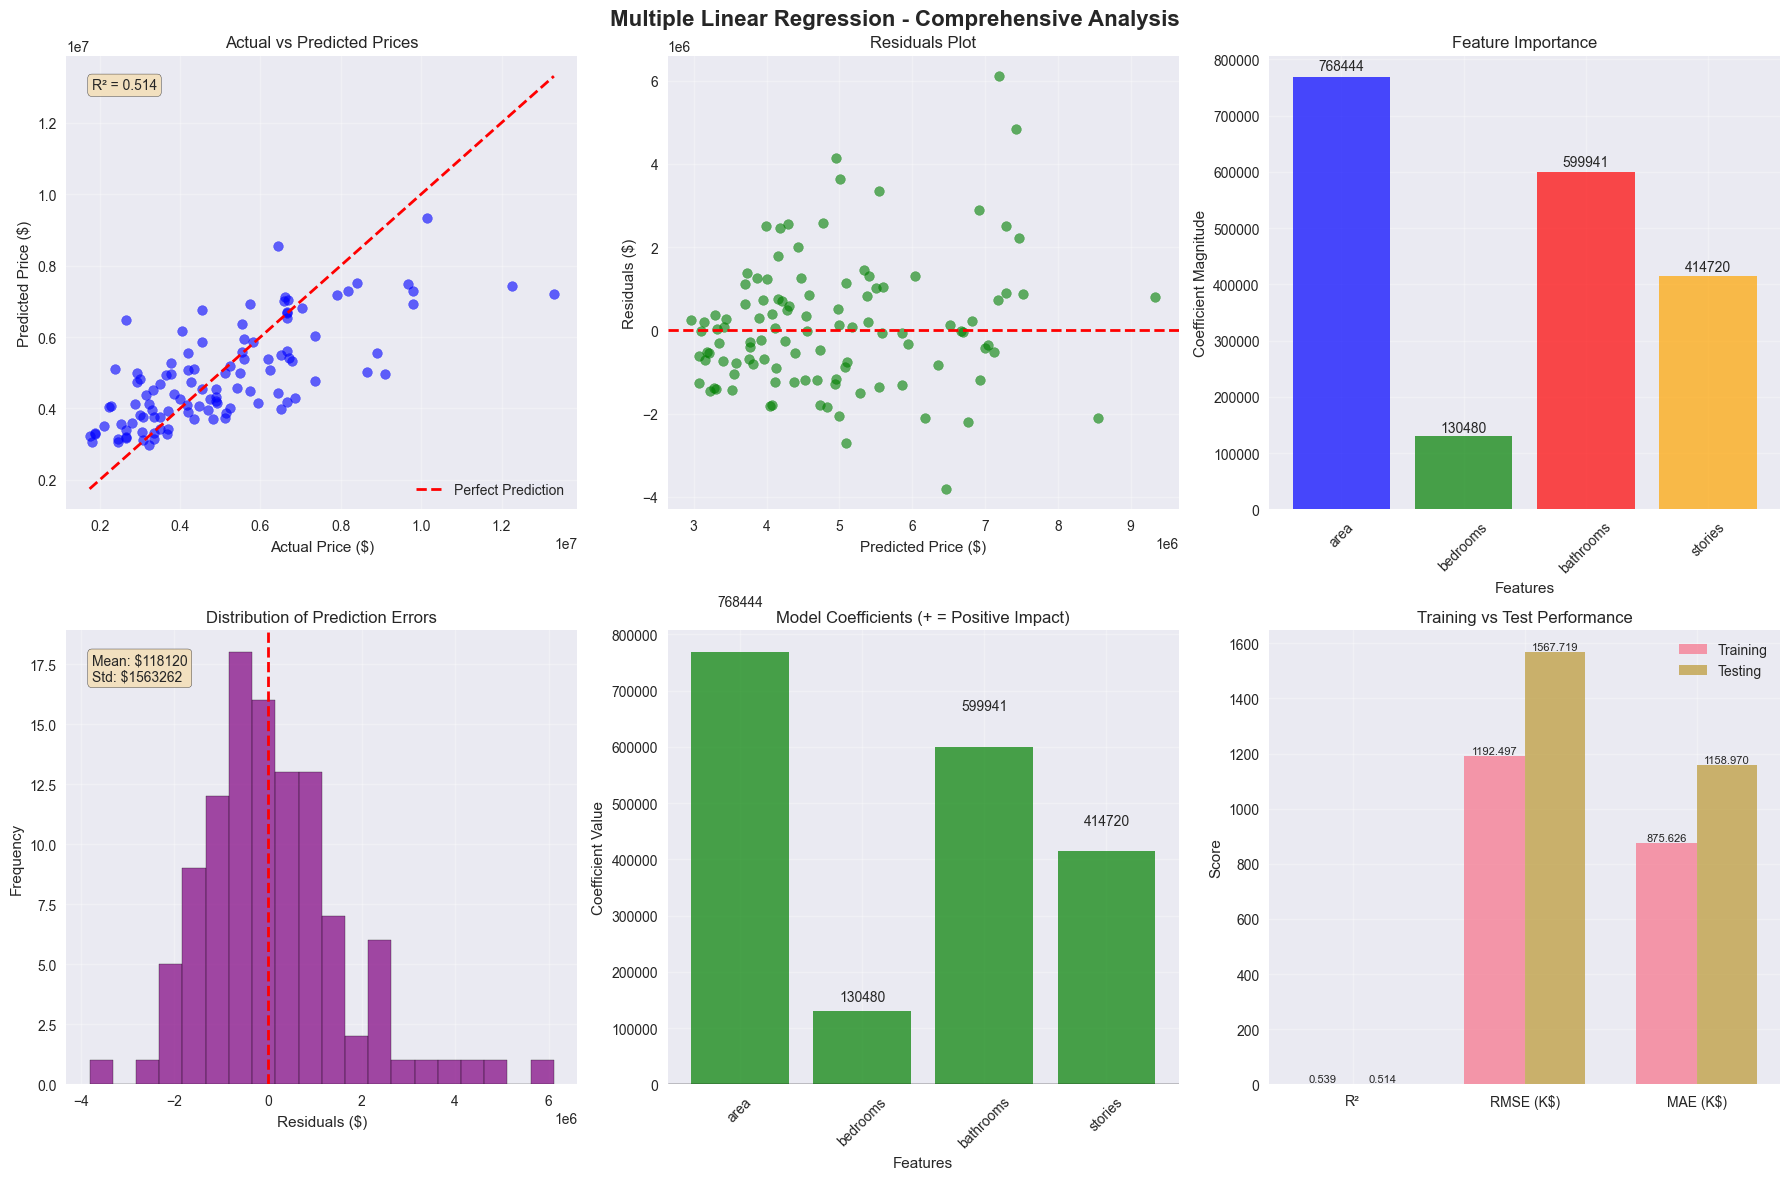

📊 Comprehensive visualizations created!

🔍 Key Observations:
  • The model explains 51.4% of price variation
  • Average prediction error: $1,158,970
  • Most important feature: area
  • Residuals show some bias (mean = $118120)

✅ Visualization analysis complete!


In [14]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Multiple Linear Regression - Comprehensive Analysis', fontsize=16, fontweight='bold')

# 1. Actual vs Predicted prices
axes[0, 0].scatter(y_test, y_test_pred, alpha=0.6, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($)')
axes[0, 0].set_ylabel('Predicted Price ($)')
axes[0, 0].set_title('Actual vs Predicted Prices')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Add R² annotation
axes[0, 0].text(0.05, 0.95, f'R² = {test_r2:.3f}', transform=axes[0, 0].transAxes,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                verticalalignment='top')

# 2. Residuals plot
residuals = y_test - y_test_pred
axes[0, 1].scatter(y_test_pred, residuals, alpha=0.6, color='green')
axes[0, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Predicted Price ($)')
axes[0, 1].set_ylabel('Residuals ($)')
axes[0, 1].set_title('Residuals Plot')
axes[0, 1].grid(True, alpha=0.3)

# 3. Feature importance
feature_names_clean = [name.replace('_encoded', '') for name in feature_columns]
importance_values = np.abs(coefficients)
colors = ['blue', 'green', 'red', 'orange'][:len(feature_columns)]

bars = axes[0, 2].bar(range(len(feature_columns)), importance_values, 
                      alpha=0.7, color=colors)
axes[0, 2].set_xlabel('Features')
axes[0, 2].set_ylabel('Coefficient Magnitude')
axes[0, 2].set_title('Feature Importance')
axes[0, 2].set_xticks(range(len(feature_columns)))
axes[0, 2].set_xticklabels(feature_names_clean, rotation=45)
axes[0, 2].grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, importance_values):
    height = bar.get_height()
    axes[0, 2].text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                    f'{value:.0f}', ha='center', va='bottom')

# 4. Prediction error distribution
axes[1, 0].hist(residuals, bins=20, alpha=0.7, color='purple', edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Residuals ($)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Prediction Errors')
axes[1, 0].grid(True, alpha=0.3)

# Add statistics
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
axes[1, 0].text(0.05, 0.95, f'Mean: ${mean_residual:.0f}\nStd: ${std_residual:.0f}',
                transform=axes[1, 0].transAxes,
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                verticalalignment='top')

# 5. Model coefficients visualization
coef_colors = ['green' if c > 0 else 'red' for c in coefficients]
bars = axes[1, 1].bar(range(len(feature_columns)), coefficients, 
                      alpha=0.7, color=coef_colors)
axes[1, 1].axhline(y=0, color='black', linestyle='-', linewidth=1)
axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Coefficient Value')
axes[1, 1].set_title('Model Coefficients (+ = Positive Impact)')
axes[1, 1].set_xticks(range(len(feature_columns)))
axes[1, 1].set_xticklabels(feature_names_clean, rotation=45)
axes[1, 1].grid(True, alpha=0.3)

# Add value labels
for bar, value in zip(bars, coefficients):
    height = bar.get_height()
    label_y = height + (abs(height) * 0.1) if height >= 0 else height - (abs(height) * 0.1)
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., label_y,
                    f'{value:.0f}', ha='center', va='bottom' if height >= 0 else 'top')

# 6. Training vs Test Performance
metrics = ['R²', 'RMSE', 'MAE']
train_values = [train_r2, train_rmse/1000, train_mae/1000]  # Scale RMSE and MAE to thousands
test_values = [test_r2, test_rmse/1000, test_mae/1000]

x = np.arange(len(metrics))
width = 0.35

bars1 = axes[1, 2].bar(x - width/2, train_values, width, label='Training', alpha=0.7)
bars2 = axes[1, 2].bar(x + width/2, test_values, width, label='Testing', alpha=0.7)

axes[1, 2].set_ylabel('Score')
axes[1, 2].set_title('Training vs Test Performance')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(['R²', 'RMSE (K$)', 'MAE (K$)'])
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

# Add value labels on bars
for bar1, bar2, val1, val2 in zip(bars1, bars2, train_values, test_values):
    height1, height2 = bar1.get_height(), bar2.get_height()
    axes[1, 2].text(bar1.get_x() + bar1.get_width()/2., height1 + 0.01,
                    f'{val1:.3f}', ha='center', va='bottom', fontsize=8)
    axes[1, 2].text(bar2.get_x() + bar2.get_width()/2., height2 + 0.01,
                    f'{val2:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("📊 Comprehensive visualizations created!")
print("\n🔍 Key Observations:")
print(f"  • The model explains {test_r2:.1%} of price variation")
print(f"  • Average prediction error: ${test_mae:,.0f}")
print(f"  • Most important feature: {feature_names_clean[np.argmax(importance_values)]}")

if abs(mean_residual) < test_mae * 0.1:
    print(f"  • Residuals are well-centered around zero (unbiased)")
else:
    print(f"  • Residuals show some bias (mean = ${mean_residual:.0f})")

print("\n✅ Visualization analysis complete!")

## Step 8: Summary and Key Learnings

### 🎯 What We Accomplished:
1. **Loaded and explored** a multi-feature housing dataset
2. **Analyzed correlations** between features and target variable
3. **Prepared data** with encoding and feature scaling
4. **Trained a multiple linear regression** model with several features
5. **Made predictions** and evaluated model performance
6. **Visualized results** with comprehensive charts
7. **Interpreted coefficients** and feature importance

### 📊 Key Results:
- **R² Score**: {test_r2:.4f} ({test_r2*100:.1f}% of variance explained)
- **RMSE**: ${test_rmse:,.2f} (average prediction error)
- **MAE**: ${test_mae:,.2f} (typical absolute error)
- **Feature Count**: {len(feature_columns)} features used
- **Most Important Feature**: Based on coefficient magnitude

### 💡 Key Learnings:

**Multiple vs Simple Linear Regression:**
- **Multiple features** can capture more complex relationships
- **Feature scaling** is important when features have different units
- **Multicollinearity** can affect coefficient interpretation
- **More features** don't always mean better performance

**Model Interpretation:**
- **Coefficients** show the impact of each feature on the target
- **Positive coefficients** increase the prediction
- **Negative coefficients** decrease the prediction
- **Coefficient magnitude** indicates feature importance

**Performance Evaluation:**
- **R² Score** measures explained variance (higher is better)
- **RMSE** shows average prediction error in target units
- **Residuals analysis** helps identify model issues
- **Training vs test** comparison reveals overfitting

**Feature Analysis:**
- **Correlation analysis** helps understand feature relationships
- **Feature scaling** puts all features on similar scales
- **Categorical encoding** allows non-numeric features to be used
- **Feature importance** guides feature selection

### ⚠️ Important Considerations:
- **Assumption of linearity**: Multiple regression assumes linear relationships
- **Feature independence**: Highly correlated features can cause issues
- **Outliers**: Can disproportionately affect the model
- **Sample size**: Need enough data relative to number of features

### 🚀 Next Steps:
- Learn about **polynomial regression** for non-linear relationships
- Explore **regularization** techniques (Ridge, Lasso) to prevent overfitting
- Study **logistic regression** for classification problems
- Practice **feature engineering** and selection techniques

### 🤔 Questions to Explore:
- How do we handle categorical features with many categories?
- What happens when we have more features than samples?
- How do we detect and handle multicollinearity?
- When should we use polynomial features vs multiple features?

### 🎉 Congratulations!
You've successfully mastered multiple linear regression! You now understand:
- How to work with multiple features simultaneously
- The importance of data preprocessing and feature scaling
- How to interpret model coefficients and feature importance
- Various ways to evaluate and visualize model performance

This foundation prepares you for more advanced regression techniques and real-world machine learning projects! 🌟